In [1]:
# confirm mtcnn was installed correctly
import mtcnn
# print version
print(mtcnn.__version__)

0.1.0


In [2]:
# face detection for the 5 Celebrity Faces Dataset
from os import listdir
from os.path import isdir
from PIL import Image
from matplotlib import pyplot
from numpy import savez_compressed, asarray, load
from mtcnn.mtcnn import MTCNN
from keras.models import load_model
from sklearn.preprocessing import LabelEncoder, Normalizer
from numpy import linalg as la
from matplotlib import pyplot
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from random import choice
from numpy import load
from numpy import expand_dims
import os
import numpy as np
import matplotlib.pyplot as plt

# Load model

path_to_model = "../models/facenet_keras.h5"
model = load_model(path_to_model)

Predicted: ben_afflek (72.341)
Expected: ben_afflek


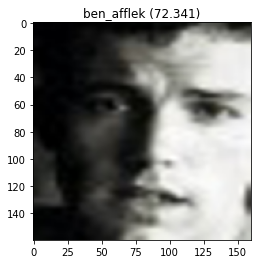

In [3]:
# develop a classifier for the 5 Celebrity Faces Dataset
from random import choice
from numpy import load
from numpy import expand_dims
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from matplotlib import pyplot
import joblib

# load faces
data = load('../data/datasets/5-celebrity-faces-dataset.npz')
testX_faces = data['arr_2']

# load face embeddings
data = load('../data/datasets/5-celebrity-faces-dataset-embeddings.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']

# normalize input vectors
in_encoder = Normalizer(norm='l2')
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)

# label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)

# fit model
model = SVC(kernel='linear', probability=True, random_state=0)
model.fit(trainX, trainy)

# save the model to disk
filename = 'svc.sav'
joblib.dump(model, filename)

# test model on a random example from the test dataset
selection = choice([i for i in range(testX.shape[0])])
random_face_pixels = testX_faces[selection]
random_face_emb = testX[selection]
random_face_class = testy[selection]
random_face_name = out_encoder.inverse_transform([random_face_class])

# prediction for the face
samples = expand_dims(random_face_emb, axis=0)
yhat_class = model.predict(samples)
yhat_prob = model.predict_proba(samples)

# get name
class_index = yhat_class[0]
class_probability = yhat_prob[0,class_index] * 100
predict_names = out_encoder.inverse_transform(yhat_class)
print('Predicted: %s (%.3f)' % (predict_names[0], class_probability))
print('Expected: %s' % random_face_name[0])

# plot for fun
pyplot.imshow(random_face_pixels)
title = '%s (%.3f)' % (predict_names[0], class_probability)
pyplot.title(title)
pyplot.show()

Predicted: ben_afflek (72.341)
Expected: ben_afflek


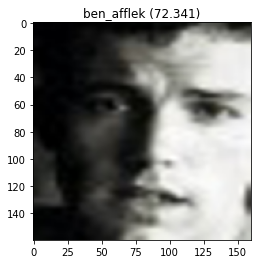

Predicted: ben_afflek (88.293)
Expected: ben_afflek


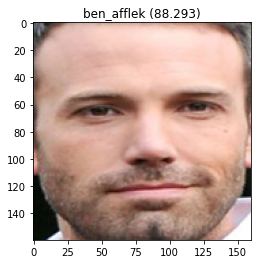

Predicted: ben_afflek (86.277)
Expected: ben_afflek


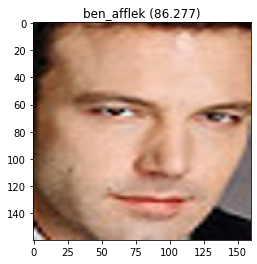

Predicted: ben_afflek (89.732)
Expected: ben_afflek


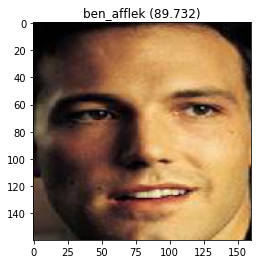

Predicted: ben_afflek (88.793)
Expected: ben_afflek


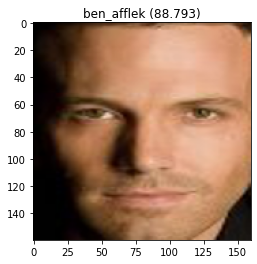

Predicted: elton_john (93.832)
Expected: elton_john


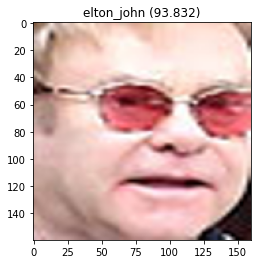

Predicted: elton_john (93.441)
Expected: elton_john


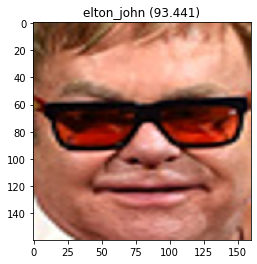

Predicted: elton_john (88.136)
Expected: elton_john


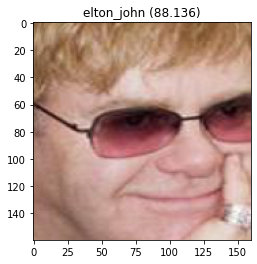

Predicted: elton_john (88.882)
Expected: elton_john


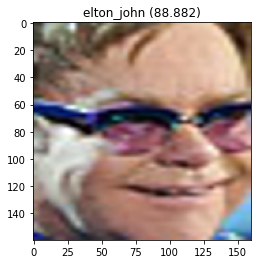

Predicted: elton_john (91.972)
Expected: elton_john


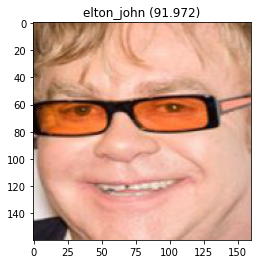

Predicted: madonna (84.314)
Expected: madonna


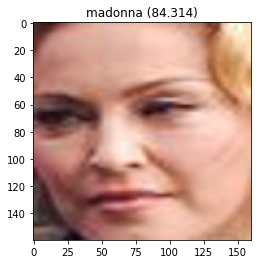

Predicted: madonna (90.100)
Expected: madonna


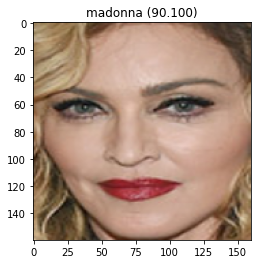

Predicted: madonna (79.318)
Expected: madonna


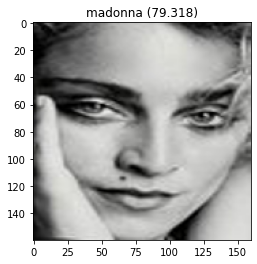

Predicted: madonna (77.440)
Expected: madonna


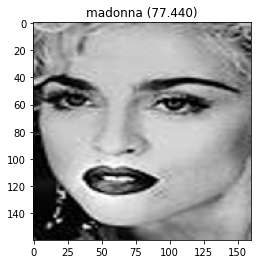

Predicted: madonna (88.640)
Expected: madonna


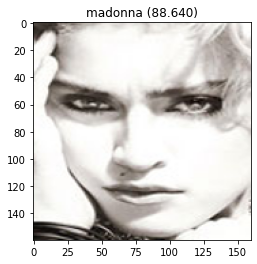

Predicted: jerry_seinfeld (89.031)
Expected: jerry_seinfeld


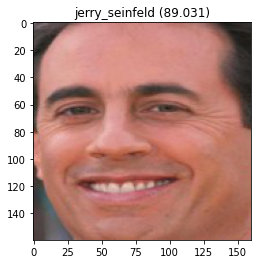

Predicted: jerry_seinfeld (83.751)
Expected: jerry_seinfeld


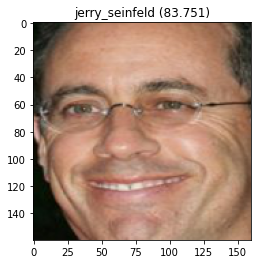

Predicted: jerry_seinfeld (72.209)
Expected: jerry_seinfeld


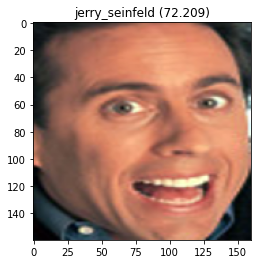

Predicted: jerry_seinfeld (86.889)
Expected: jerry_seinfeld


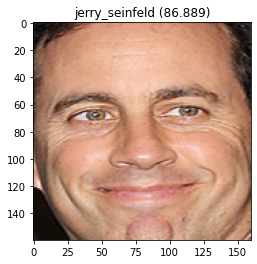

Predicted: jerry_seinfeld (84.403)
Expected: jerry_seinfeld


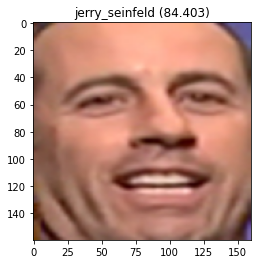

Predicted: mindy_kaling (90.642)
Expected: mindy_kaling


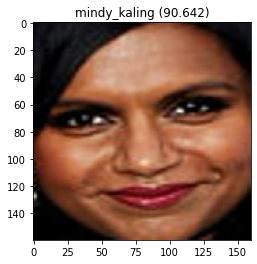

Predicted: mindy_kaling (91.282)
Expected: mindy_kaling


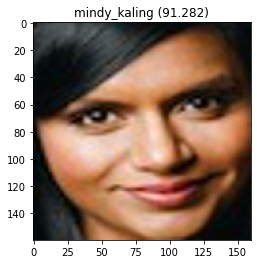

Predicted: mindy_kaling (91.535)
Expected: mindy_kaling


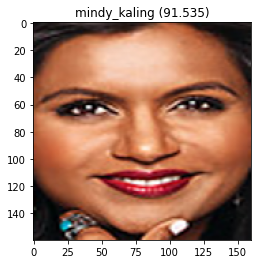

Predicted: mindy_kaling (92.700)
Expected: mindy_kaling


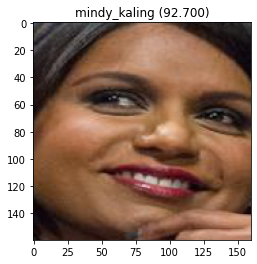

Predicted: mindy_kaling (79.869)
Expected: mindy_kaling


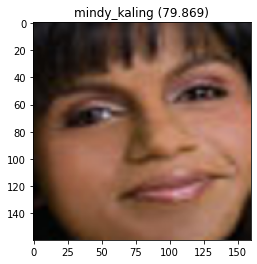

In [4]:
#Define True Positive (TP) and False Positive (FP)
TP = []
FP = []

#Store predicted classes and probabilities
prediction = []
probabilities = []
classes = []

# Predict every face in the test set and compare with the expected label
for i in range(len(testX_faces)):
    face_pixels = testX_faces[i]
    face_emb = testX[i]
    face_class = testy[i]
    face_name = out_encoder.inverse_transform([testy[i]])
    
    # prediction for the face
    #sample = expand_dims(testX[i], axis=0)
    sample = face_emb.reshape(1, 128)
    yhat_class = model.predict(sample)
    prediction.append(yhat_class)
    yhat_prob = model.predict_proba(sample)
    probabilities.append(yhat_prob)
    
    #Compare with expected label
    if yhat_class == face_class:
        TP.append(i)
    else:
        FP.append(i)
        
     # get name
    all_class_index = yhat_class[0]
    all_class_probability = yhat_prob[0,all_class_index] * 100
    predict_all_names = out_encoder.inverse_transform(yhat_class)
    classes.append(predict_all_names)
    print('Predicted: %s (%.3f)' % (predict_all_names[0], all_class_probability))
    print('Expected: %s' % face_name[0])

    # plot for fun
    pyplot.imshow(face_pixels)
    title_2 = '%s (%.3f)' % (predict_all_names[0], all_class_probability)
    pyplot.title(title_2)
    pyplot.show()



System accuracy
Correctly classify: 100.0%
Incorrectly classify: 0.0%


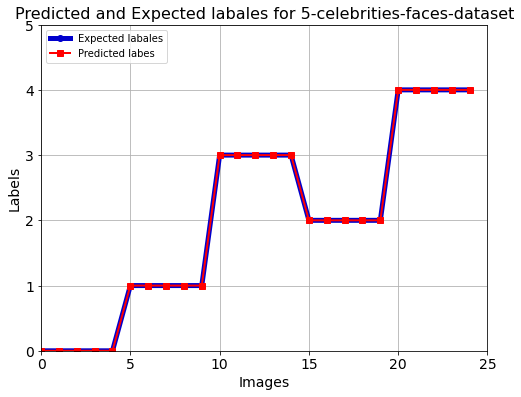

In [5]:
#Metrics
TP_perc = (len(TP)/len(testX_faces))*100
FP_perc = (len(FP)/len(testX_faces))*100
X = float(TP_perc)
Y = float(FP_perc)
TPR  = round(X, 2)
FPR  = round(Y, 2)

print('System accuracy')
print('Correctly classify: %s' % (TPR) + '%')
print('Incorrectly classify: %s' % (FPR) + '%') 

#Plotting labels
f, ax1 = plt.subplots(1, 1, sharex=True, figsize=(8, 6))

ax1.plot(testy, color="mediumblue", linestyle="-", marker="o", linewidth=5, label="Expected labales")
ax1.plot(prediction, color="r", linestyle="-", marker="s", linewidth=2, label="Predicted labes")

ax1.set_title('Predicted and Expected labales for 5-celebrities-faces-dataset', fontsize=16, fontweight='normal')
# ax1.spines['top'].set_visible(False)
# ax1.spines['right'].set_visible(False)
plt.legend(loc='upper left')
plt.xticks(fontsize=14,fontweight='normal')
plt.yticks(fontsize=14,fontweight='normal')
plt.xlabel('Images', fontsize=14)
plt.ylabel('Labels', fontsize=14)
plt.xlim(0, 25)
plt.ylim(0, 5)
plt.grid(b=None, which='major', axis='both')
plt.savefig('predicted vs. expected.png')
plt.show()

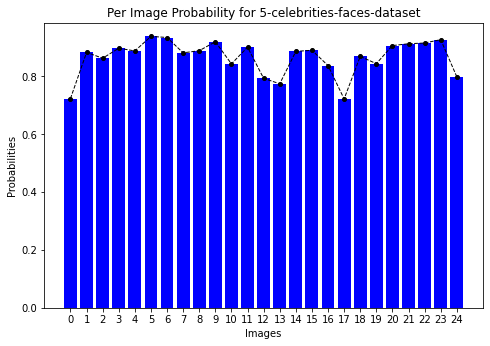

In [6]:
prob = []
for i in probabilities:
    prob.append(max(max(i)))

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

labels = []
for i in range(len(prob)):
    if testy[i] != testy[i-1]:
        labels.append(classes[i])
        
ax.set_xlabel("Images")
ax.set_ylabel('Probabilities')
ax.set_title("Per Image Probability for 5-celebrities-faces-dataset")

colors = np.random.rand(len(labels),3)

for i in range(len(prob)):
#    for c in range(len(colors)):
#        if  testy[i] == testy[i-1]:
           ax.bar(i, prob[i], color='b')
#        else:
           # ax.bar(i, prob[i], color=new_color)
            
#color_map = np.random.rand(len(labels),3)
#def new_color():
  #  for l in labels:
 #       color  = color_map[l]
#return color


plt.xticks(range(len(prob)), range(len(prob)), fontsize=10, rotation=0)
ax.plot(range(len(prob)), prob[0:], color='black', marker='o', linestyle='dashed', linewidth = 1, markersize = 4)
fig.tight_layout(pad=5) 


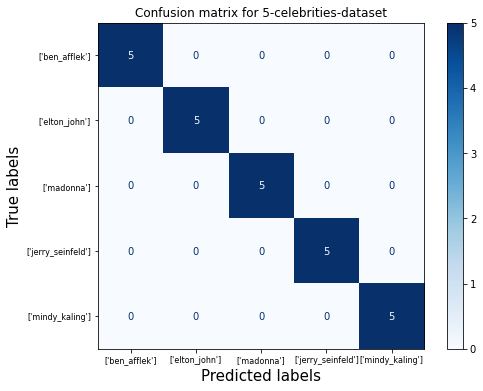

In [7]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
C = plot_confusion_matrix(model, testX, testy, display_labels = labels, xticks_rotation = 0, cmap=plt.cm.Blues, ax = ax)
                  
C.ax_.set_title("Confusion matrix for 5-celebrities-dataset")
ax.tick_params(axis='both', which='major', labelsize=8)
plt.xlabel('Predicted labels', fontsize = 15)
plt.ylabel('True labels', fontsize = 15)
    #print(title)
   # print(C.confusion_matrix)

plt.show()

In [8]:
def extract_image(filename, required_size=(160, 160)):
	# load image from file
	image = Image.open(filename)
	# convert to RGB, if needed
	image = image.convert('RGB')
	# convert to array
	pixels = asarray(image)
	# resize pixels to the model size
#	image_size = Image.fromarray(pixels)
#	image_size = image.resize(required_size)
#	size_array = asarray(image_size)
	return pixels

# load all images in a directory
def load_images(directory):
	images = list()
	# enumerate files
	for filename in listdir(directory):
		# path
		path = directory + filename
		# get face
		image = extract_image(path)
		# store
		images.append(image)
	return images


# load a dataset that contains one subdir for each class that in turn contains images
def load_dataset(directory):
	X, y = list(), list()
	# enumerate folders, on per class
	for subdir in listdir(directory):
		# path
		path = directory + subdir + '/'
		# skip any files that might be in the dir
		if not isdir(path):
			continue
		# load all faces in the subdirectory
		images = load_images(path)
		# create labels
		labels = [subdir for _ in range(len(images))]
		# summarize progress
		print('>loaded %d examples for class: %s' % (len(images), subdir))
		# store
		X.extend(images)
		y.extend(labels)
	return asarray(X), asarray(y)


# load test dataset
test_X, test_y = load_dataset('../imgs/5-celebrities-dataset/val/')
#print(test_X.shape, test_y.shape)
# save arrays to one file in compressed format
savez_compressed('5-celebrity-faces-dataset_val.npz', test_X, test_y)

>loaded 5 examples for class: mindy_kaling
>loaded 5 examples for class: elton_john
>loaded 5 examples for class: jerry_seinfeld
>loaded 5 examples for class: madonna
>loaded 5 examples for class: ben_afflek


In [9]:
raw_data = np.load("5-celebrity-faces-dataset_val.npz", allow_pickle=True)

raw_testX, raw_testy = raw_data["arr_0"], raw_data["arr_1"]
print("Loaded: ", raw_testX.shape, raw_testy.shape)

Loaded:  (25,) (25,)


0

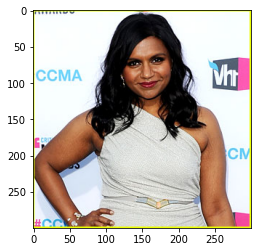

In [10]:
pyplot.imshow(raw_testX[selection])
selection

0


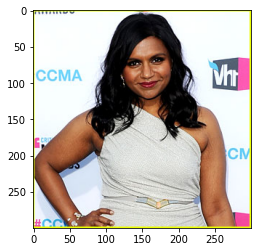

0


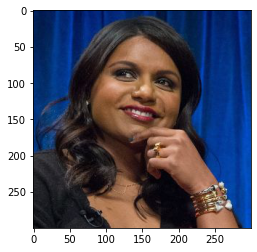

0


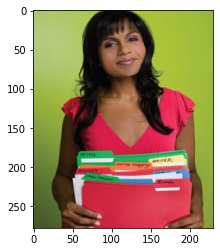

0


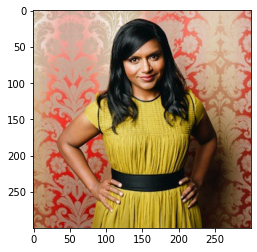

0


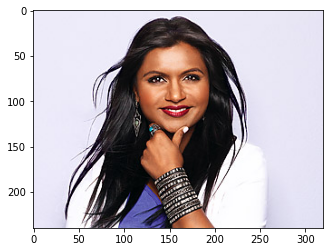

1


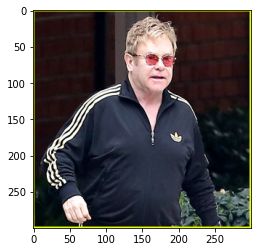

1


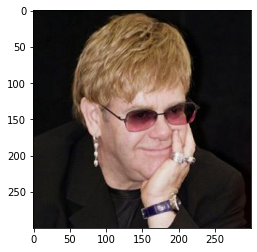

1


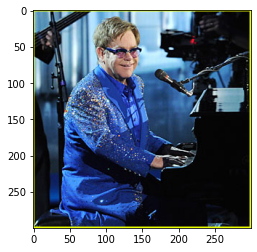

1


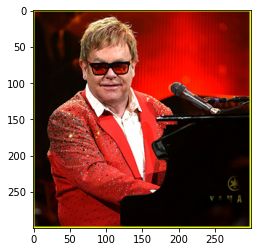

1


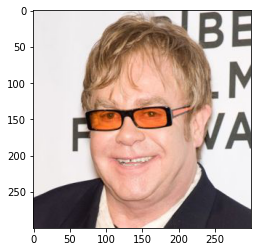

3


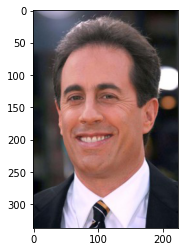

3


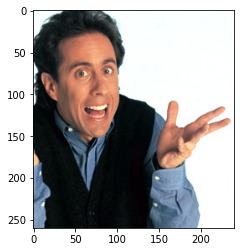

3


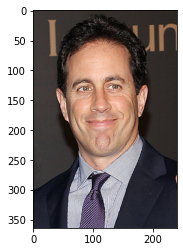

3


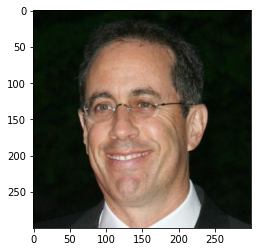

3


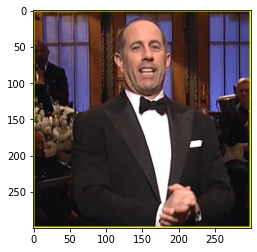

2


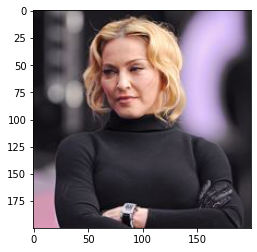

2


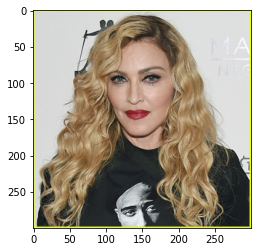

2


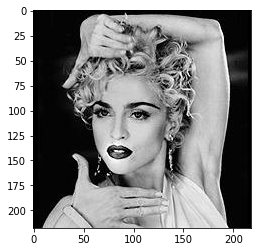

2


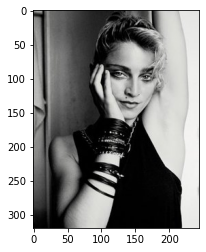

2


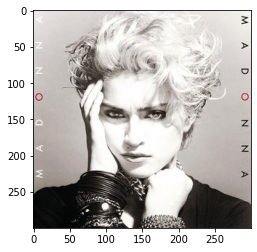

4


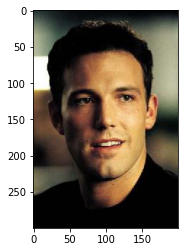

4


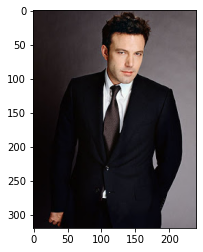

4


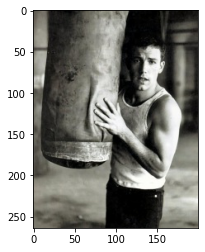

4


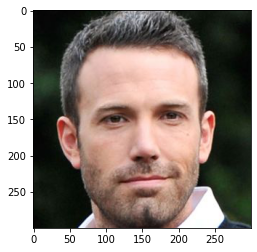

4


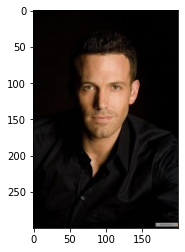

In [15]:
for i in range(len(test_X)):
        print(testy[i])
        pyplot.imshow(test_X[i])
        pyplot.show()    

[0.10923372829622409, 0.1425432918221698, 0.149250538964036, 0.06921808921960858, 0.18127079367695453, 0.14611905045697982, 0.18122037086304985, 0.04421708162956043, 0.07856815203294708, 0.11514828846804422, 0.11368718053116283, 0.2185887805171003, 0.12592018691372905, 0.19775651616871895, 0.1494533757145288, 0.12539597970567282, 0.11860376847831934, 0.12988660188874254, 0.1218745178847797, 0.14639429248277028, 0.16985961983475198, 0.21768382280060775, 0.08630298913542017, 0.12481500557106302, 0.1649917375598749]
WASD
0.2185887805171003


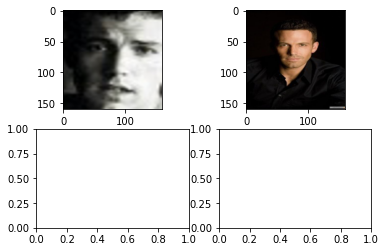

In [11]:
from skimage.metrics import structural_similarity

maxim = 0
ssim_list = []
width_resize = 160
height_resize = 160

for i in range(len(test_X)):
    test_img = Image.fromarray(test_X[i])
    test_img = test_img.resize((width_resize, height_resize))
    test_img = np.array(test_img)
    #print(test_img.shape)
    ssim = structural_similarity(random_face_pixels, test_img, multichannel=True, full=False)
    ssim_list.append(ssim)
    
print(ssim_list)

max_position = 0
for i in range(len(ssim_list)):
    if ssim_list[i] == max(ssim_list):
        max_position = i               
 

f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(random_face_pixels)
axarr[0,1].imshow(test_img)
#axarr[1,0].imshow(image_datas[2])
#axarr[1,1].imshow(image_datas[3])

#plt.imshow(random_face_pixels)
#plt.plot(test_X[max_position])
#plt.show()

#pyplot.show()
#print(ssim_list)
print("WASD")
print(max(ssim_list))
#maximo = max(ssim_list)
#max_position